In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [3]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [4]:
path = "kddcup.data.corrected"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [5]:
df.shape

(4898431, 43)

In [6]:
df['target'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: target, dtype: int64

In [7]:
df['Attack Type'].value_counts()

dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: Attack Type, dtype: int64

In [8]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'flag', 'protocol_type']

In [11]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

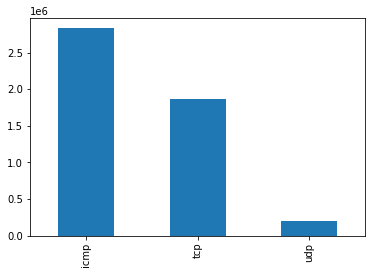

In [12]:
bar_graph('protocol_type')

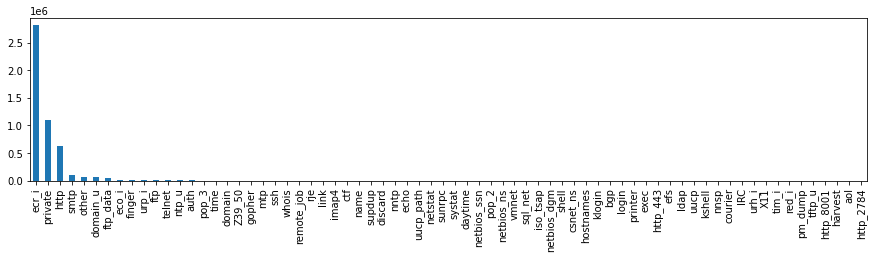

In [13]:
plt.figure(figsize=(15,3))
bar_graph('service')

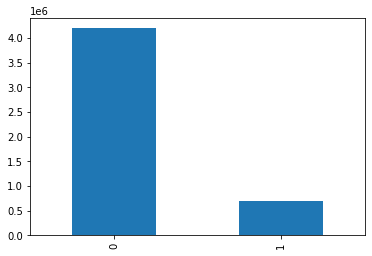

In [14]:
bar_graph('logged_in')

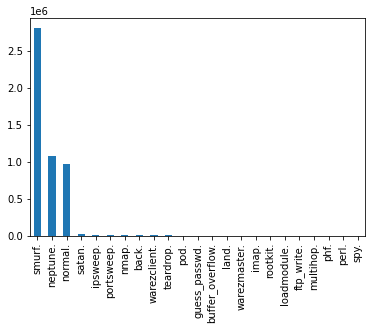

In [15]:
bar_graph('target')

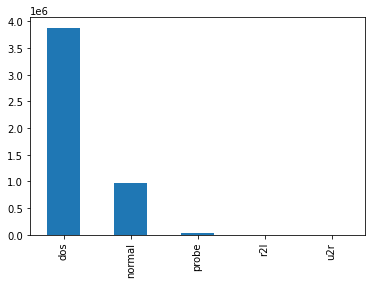

In [16]:
bar_graph('Attack Type')

In [17]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

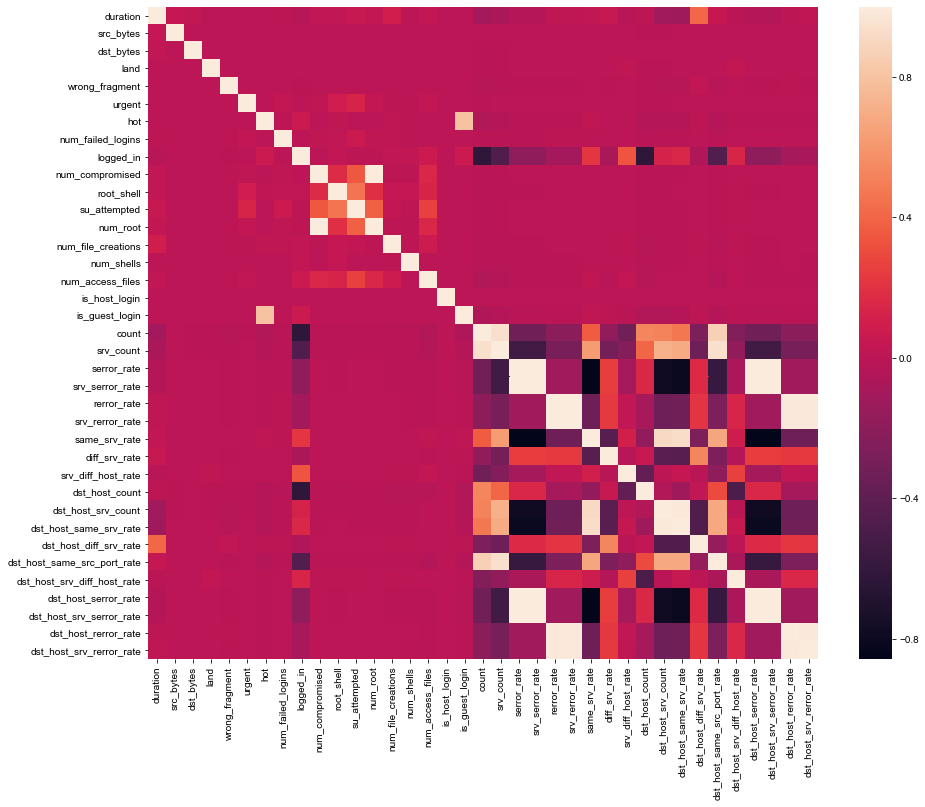

In [21]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)
#sns.figure.axes[-1].yaxis.label.set_size(20)
#sns.set(font_scale=1.4)
plt.show()

In [20]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                       0.000639
land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
dst_host_rerror_rate                0.230943
dst_host_srv_rerror_rate            0.230978
rerror_rate                         0.232253
srv_rerror_rate                     0.232660
logged_in                           0.350612
dst_host_serror_rate                0.381838
serror_rate                         0.381876
dst_host_s

In [21]:
df['protocol_type'].value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: protocol_type, dtype: int64

In [22]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [23]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [24]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,1,http,0,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,1,http,0,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,1,http,0,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [25]:
df.drop('service',axis = 1,inplace= True)

In [26]:
df.shape

(4898431, 41)

In [27]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,0,215,45076,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,1,0,162,4528,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,1,0,236,1228,0,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,1,0,233,2032,0,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


df.head

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [29]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4898431, 40)
(3281948, 39) (1616483, 39)
(3281948, 1) (1616483, 1)


In [30]:
#KNearestNeighbor starts here
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

#start_time = time.time()
#knn.fit(X_train, Y_train.values.ravel())
#end_time = time.time()
#print("Training time: ",end_time-start_time)

In [31]:
#KNN testing time
#start_time = time.time()
#Y_test_pred1 = knn.predict(X_test)
#end_time = time.time()
#print("Testing time: ",end_time-start_time)

In [32]:
#KNN Training time
#print("Train score is:", knn.score(X_train, Y_train))
#print("Test score is:",knn.score(X_test,Y_test))

In [33]:
df.shape

(4898431, 40)

In [34]:
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [35]:
x=df.iloc[:,0:39]
y=df.iloc[:,[-1]]

In [36]:
x.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,215,45076,0,0,0,0,0,...,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,1,0,162,4528,0,0,0,0,0,...,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,1,0,236,1228,0,0,0,0,0,...,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,1,0,233,2032,0,0,0,0,0,...,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,1,0,239,486,0,0,0,0,0,...,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [37]:
y.head

<bound method NDFrame.head of         Attack Type
0            normal
1            normal
2            normal
3            normal
4            normal
...             ...
4898426      normal
4898427      normal
4898428      normal
4898429      normal
4898430      normal

[4898431 rows x 1 columns]>

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=13)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [40]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [41]:
#SupportVectorMachine starts here
clf=svm.SVC()

In [42]:
start_time = time.time()
clf.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  2472.024066209793


In [43]:
start_time = time.time()
Y_test_pred_SVM = clf.predict(x_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  202.1882619857788


In [44]:
print("Train score is:", clf.score(x_train, y_train))
print("Test score is:",clf.score(x_test,y_test))

Train score is: 0.9996940346192555
Test score is: 0.9996233490900666


In [45]:
sklearn.metrics.accuracy_score(y_test, Y_test_pred_SVM)

0.9996233490900666

In [46]:
print(sklearn.metrics.classification_report(y_test, Y_test_pred_SVM))

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    776980
      normal       1.00      1.00      1.00    194138
       probe       1.00      0.98      0.99      8311
         r2l       0.87      0.75      0.81       247
         u2r       1.00      0.18      0.31        11

    accuracy                           1.00    979687
   macro avg       0.97      0.78      0.82    979687
weighted avg       1.00      1.00      1.00    979687



In [146]:
pred_clf=clf.predict(x_test)

In [147]:
sklearn.metrics.accuracy_score(y_test, pred_clf)

0.9996233490900666

In [148]:
print(sklearn.metrics.classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    776980
      normal       1.00      1.00      1.00    194138
       probe       1.00      0.98      0.99      8311
         r2l       0.87      0.75      0.81       247
         u2r       1.00      0.18      0.31        11

    accuracy                           1.00    979687
   macro avg       0.97      0.78      0.82    979687
weighted avg       1.00      1.00      1.00    979687



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x_train, y_train.values.ravel())

In [ ]:
pred_knn=knn.predict(x_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test, pred_knn)

In [76]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [77]:
start_time = time.time()
NB.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  5.3929057121276855


In [79]:
start_time = time.time()
Y_test_pred_NB = NB.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  3.415102958679199


In [80]:
print("Train score is:", NB.score(X_train, Y_train))
print("Test score is:",NB.score(X_test,Y_test))

Train score is: 0.8815380377751262
Test score is: 0.8810114303707494


In [81]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_NB))

              precision    recall  f1-score   support

         dos       0.98      0.95      0.96   1281483
      normal       1.00      0.62      0.76    321021
       probe       0.10      0.97      0.18     13594
         r2l       0.03      0.44      0.06       365
         u2r       0.00      0.90      0.00        20

    accuracy                           0.88   1616483
   macro avg       0.42      0.78      0.39   1616483
weighted avg       0.97      0.88      0.91   1616483



In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    groups=None,
    scoring=None,
    cv='warn',
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score='raise-deprecating',
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like
    The data to fit. Can be for example a list, or an array.

y : array-like, optional, default: None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like, with shape (n_samples,), optional
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" `cv` instance
    (e.g., `GroupKFold`).

scoring : string, callable or None, optional, default: None
    A string (see model evaluation documentation) or
    a scorer

In [96]:
print(x.values)

[[0.   1.   0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   1.   0.   ... 0.01 0.   0.  ]
 [0.   1.   0.   ... 0.01 0.   0.  ]
 [0.   1.   0.   ... 0.01 0.   0.  ]]


In [97]:
print(y.values)

[['normal']
 ['normal']
 ['normal']
 ...
 ['normal']
 ['normal']
 ['normal']]


In [100]:
NB = GaussianNB()
scores = cross_val_score(NB, x.values, y.values.ravel(), cv=5)
scores

array([0.97839212, 0.93555084, 0.92237403, 0.90214304, 0.89389549])

In [101]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.06)


In [108]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [112]:
# Nested CV with parameter optimization
nested_score = cross_val_score(NB, X=x.values, y=y.values.ravel(), cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

         dos       0.99      1.00      1.00    776674
      normal       0.96      0.95      0.95    194557
       probe       0.02      0.00      0.00      8221
         r2l       0.21      0.01      0.02       226
         u2r       0.00      0.73      0.00        11

    accuracy                           0.98    979689
   macro avg       0.44      0.54      0.40    979689
weighted avg       0.98      0.98      0.98    979689

              precision    recall  f1-score   support

         dos       0.94      1.00      0.97    776674
      normal       0.99      0.72      0.83    194556
       probe       0.00      0.00      0.00      8221
         r2l       0.00      0.00      0.00       225
         u2r       0.00      0.64      0.00        11

    accuracy                           0.94    979687
   macro avg       0.39      0.47      0.36    979687
weighted avg       0.94      0.94      0.93    979687

              precisio

In [113]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [114]:
start_time = time.time()
DT.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  15.817380666732788


In [115]:
start_time = time.time()
Y_test_pred_DT = DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.6485893726348877


In [116]:
print("Train score is:", DT.score(X_train, Y_train))
print("Test score is:",DT.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_DT))

Train score is: 0.9958134620048825
Test score is: 0.9957976669101994


C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00   1281483
      normal       0.98      1.00      0.99    321021
       probe       0.99      0.64      0.78     13594
         r2l       0.00      0.00      0.00       365
         u2r       0.00      0.00      0.00        20

    accuracy                           1.00   1616483
   macro avg       0.59      0.53      0.55   1616483
weighted avg       1.00      1.00      1.00   1616483



In [117]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=30)

In [118]:
start_time = time.time()
RF.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  119.17974877357483


In [119]:
start_time = time.time()
Y_test_pred_RF = RF.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  4.081612825393677


In [120]:
print("Train score is:", RF.score(X_train, Y_train))
print("Test score is:",RF.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_RF))

Train score is: 0.9999744054445713
Test score is: 0.9998836981273542
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00   1281483
      normal       1.00      1.00      1.00    321021
       probe       1.00      0.99      1.00     13594
         r2l       0.96      0.93      0.94       365
         u2r       1.00      0.20      0.33        20

    accuracy                           1.00   1616483
   macro avg       0.99      0.82      0.85   1616483
weighted avg       1.00      1.00      1.00   1616483



In [125]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1200000)

In [126]:
start_time = time.time()
LR.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training time:  146.95847535133362


In [127]:
start_time = time.time()
Y_test_pred_LR = LR.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.21118998527526855


In [128]:
print("Train score is:", LR.score(X_train, Y_train))
print("Test score is:",LR.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_LR))

Train score is: 0.9981288551799115
Test score is: 0.9981063828076138
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00   1281483
      normal       0.99      1.00      1.00    321021
       probe       0.98      0.90      0.94     13594
         r2l       0.14      0.02      0.03       365
         u2r       0.50      0.05      0.09        20

    accuracy                           1.00   1616483
   macro avg       0.72      0.59      0.61   1616483
weighted avg       1.00      1.00      1.00   1616483



In [129]:
#GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)

In [130]:
start_time = time.time()
GBC.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

Training time:  4019.4218621253967


In [131]:
start_time = time.time()
Y_test_pred_GBC = GBC.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  10.128207683563232


In [132]:
print("Train score is:", GBC.score(X_train, Y_train))
print("Test score is:", GBC.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_GBC))

Train score is: 0.9995898777189645
Test score is: 0.9995310807475241
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00   1281483
      normal       1.00      1.00      1.00    321021
       probe       1.00      0.98      0.99     13594
         r2l       0.70      0.66      0.68       365
         u2r       0.64      0.35      0.45        20

    accuracy                           1.00   1616483
   macro avg       0.87      0.80      0.82   1616483
weighted avg       1.00      1.00      1.00   1616483



In [133]:
#Keras Classifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [137]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(38,input_dim =39,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [138]:
KC = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [139]:
start = time.time()
KC.fit(X_train, Y_train.values.ravel())
end = time.time()


Epoch 1/100
3281948/3281948 [==============================] - 30s 9us/step - loss: 0.0590 - accuracy: 0.9871
Epoch 2/100
3281948/3281948 [==============================] - 29s 9us/step - loss: 0.0120 - accuracy: 0.9988
Epoch 3/100
3281948/3281948 [==============================] - 29s 9us/step - loss: 0.0099 - accuracy: 0.9990
Epoch 4/100
3281948/3281948 [==============================] - 28s 9us/step - loss: 0.0094 - accuracy: 0.9990
Epoch 5/100
3281948/3281948 [==============================] - 29s 9us/step - loss: 0.0085 - accuracy: 0.9990
Epoch 6/100
3281948/3281948 [==============================] - 29s 9us/step - loss: 0.0049 - accuracy: 0.9990
Epoch 7/100
3281948/3281948 [==============================] - 29s 9us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 8/100
3281948/3281948 [==============================] - 30s 9us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 9/100
3281948/3281948 [==============================] - 29s 9us/step - loss: 0.0027 - accuracy: 0.9995
Epoch 10/

In [140]:
print('Training time')
print((end-start))

Training time
2900.1601164340973


In [141]:
start_time = time.time()
Y_test_pred_KC = KC.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  4.322932958602905


In [142]:
start_time = time.time()
Y_train_pred_KC = KC.predict(X_train)
end_time = time.time()
print(accuracy_score(Y_train,Y_train_pred_KC))
print(accuracy_score(Y_test,Y_test_pred_KC))

0.9995837837771957
0.9995403601522564


In [143]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_KC))

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00   1281483
      normal       1.00      1.00      1.00    321021
       probe       0.97      0.99      0.98     13594
         r2l       0.00      0.00      0.00       365
         u2r       0.00      0.00      0.00        20

    accuracy                           1.00   1616483
   macro avg       0.59      0.60      0.60   1616483
weighted avg       1.00      1.00      1.00   1616483

